In [5]:
import cv2
import numpy as np
import imutils
from ultralytics import YOLO
import math
import torch

In [6]:
def find_marker(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5) , 0)
    edged = cv2.Canny(gray , 75, 150)

    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)

    return cv2.minAreaRect(c)

def distance_to_camera(knownWidth, focalLength, perWidth):
    return (knownWidth * focalLength) / perWidth

In [7]:
KNOWN_DISTANCE = 50.0
KNOWN_WIDTH = 30.0

img_path = r"C:\Users\Abhim\Documents\Python_Programs\ArrowDetect\DatasetV3\test\images\test1frame0065_png.rf.0fe9db2aff737a1231ccb7308bb91db8.jpg"
image = cv2.imread(img_path)
marker = find_marker(image)
focalLength = (marker[1][0] * KNOWN_DISTANCE) / KNOWN_WIDTH

Using cache found in C:\Users\Abhim/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-18 Python-3.10.10 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


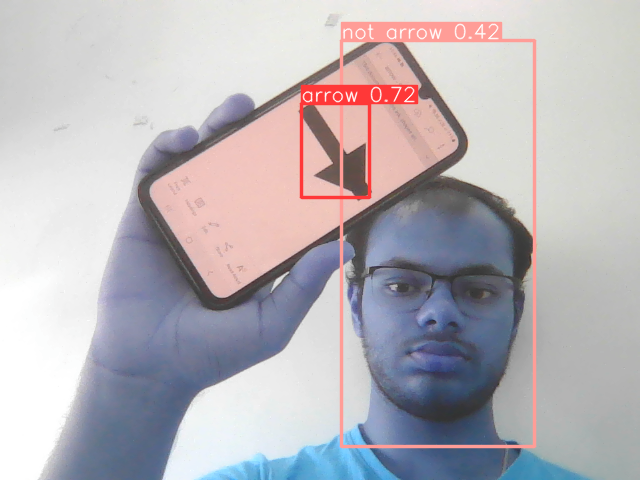

image 1/1: 480x640 1 arrow, 1 not arrow
Speed: 2.0ms pre-process, 14.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
tensor([[3.01544e+02, 1.03980e+02, 3.69066e+02, 1.97686e+02, 7.17252e-01, 0.00000e+00],
        [3.41105e+02, 4.05186e+01, 5.34606e+02, 4.46591e+02, 4.19675e-01, 1.00000e+00]], device='cuda:0')
55.853210320203736


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [17]:
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5\yolov5m_25epochs.pt')
classNames = ['arrow','not arrow']
while True:
    ret, video = cap.read()
    marker = find_marker(video)
    dist = distance_to_camera(KNOWN_WIDTH, focalLength, marker[1][0])
    cv2.imshow("video", video)
    results = model(video)
    results.show()
    for box in results.xyxy[0]: 
            if box[5]==0:
    
                xB = int(box[2])
                xA = int(box[0])
                yB = int(box[3])
                yA = int(box[1])
                
                cv2.rectangle(video, (xA, yA), (xB, yB), (0, 0, 255), 2)
                cv2.imshow("OutputWindow",video)
    print (results)
    print (results.xyxy[0])
    
    print (dist)

    if cv2.waitKey(0) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()